# Machine Learning Solution for House Price Prediction

In [1]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# a. Choose Regression Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate accuracy based on the specified columns to exclude
def calculate_accuracy(model, X_train, y_train, X_test, y_test, excluded_columns):
    # Train the model
    model.fit(X_train.drop(excluded_columns, axis=1), y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test.drop(excluded_columns, axis=1))
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Part 1 : Dataset Exploration and Visualization

    # 1.1 - Loading

In [2]:
# Load the dataset
file_path = 'house_price_dataset.csv'
initial_house_data = pd.read_csv(file_path)
house_data = initial_house_data

    # 1.2 - Preview

In [3]:
print("First few rows of the dataset:")
print(house_data.head())

First few rows of the dataset:
   No  transaction date  house age  distance to the nearest bus station  \
0   1          2012.917       32.0                             84.87882   
1   2          2012.917       19.5                            306.59470   
2   3          2013.583       13.3                            561.98450   
3   4          2013.500       13.3                            561.98450   
4   5          2012.833        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9  24.98034  121.53951                      42.2  
2                             5  24.98746  121.54391                      47.3  
3                             5  24.98746  121.54391                      54.8  
4                             5  24.97937  121.54245                      43.1  


    # 1.3 - Distribution Visualization

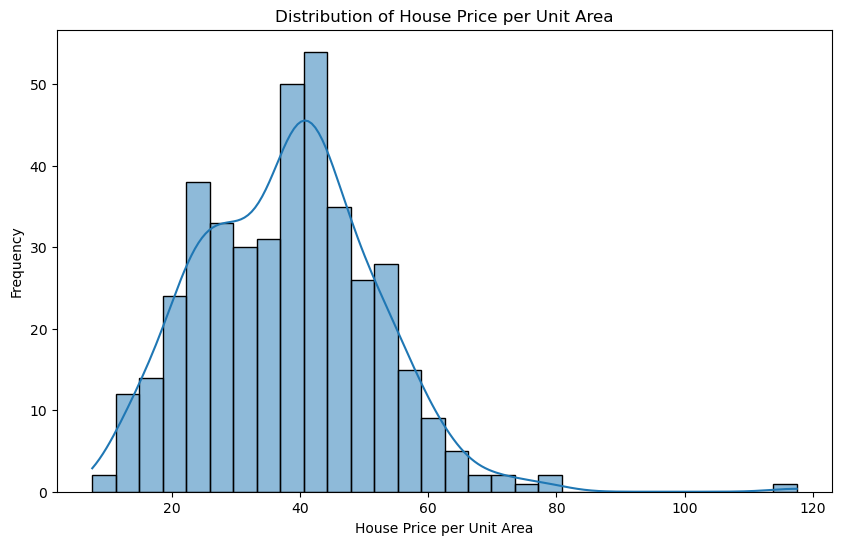

In [4]:
# Visualize the distribution of the target label (house price per unit area)
plt.figure(figsize=(10, 6))
sns.histplot(house_data['house price of unit area'], bins=30, kde=True)
plt.title('Distribution of House Price per Unit Area')
plt.xlabel('House Price per Unit Area')
plt.ylabel('Frequency')
plt.show()

# Part 2: Data Preprocessing

    # 2.1 - Check for Missing Values

In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(house_data.isnull().sum())


Missing values in the dataset:
No                                     0
transaction date                       0
house age                              0
distance to the nearest bus station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64


    # 2.2 - Outlier Detection and Data Transformation

Text(0.5, 1.0, 'Distance to Bus Station')

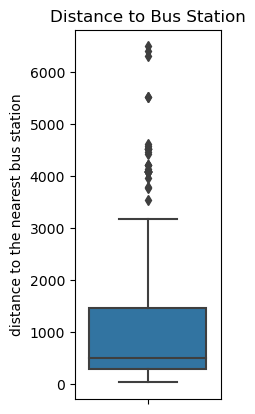

In [6]:
# b. Outlier Detection and Transformation

# Boxplot for 'distance to the nearest bus station'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['distance to the nearest bus station'])
plt.title('Distance to Bus Station')

In [7]:
#Drop the outliers
z = np.abs(stats.zscore(house_data['distance to the nearest bus station']))
threshold = 1.3
outliers = house_data[z > threshold]

# drop rows containing outliers
house_data = house_data.drop(outliers.index)

Text(0.5, 1.0, 'transaction date')

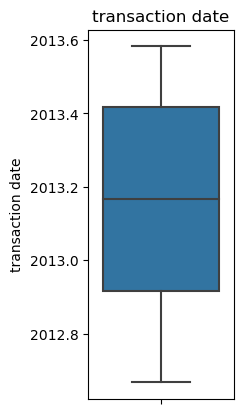

In [8]:
# Boxplot for 'transaction date'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['transaction date'])
plt.title('transaction date')

Text(0.5, 1.0, 'house age')

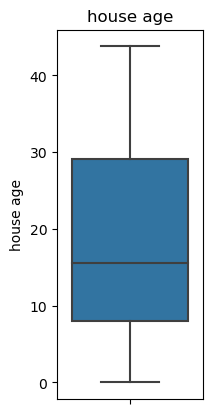

In [9]:
# Boxplot for 'house age'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['house age'])
plt.title('house age')

Text(0.5, 1.0, 'number of convenience stores')

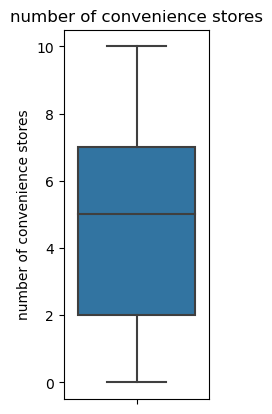

In [10]:
# Boxplot for 'house age'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['number of convenience stores'])
plt.title('number of convenience stores')

Text(0.5, 1.0, 'house price of unit area')

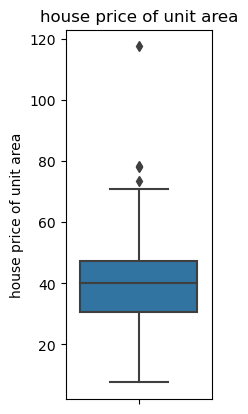

In [11]:
# Boxplot for 'house price of unit area'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['house price of unit area'])
plt.title('house price of unit area')

In [12]:
#Drop the outliers
z = np.abs(stats.zscore(house_data['house price of unit area']))
threshold = 1.3
outliers = house_data[z > threshold]

# drop rows containing outliers
house_data = house_data.drop(outliers.index)

Text(0.5, 1.0, 'latitude')

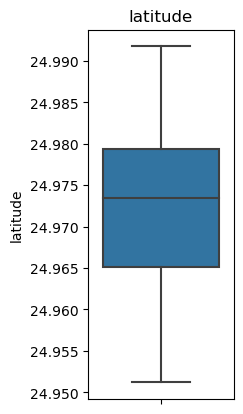

In [13]:
# Boxplot for 'latitude'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['latitude'])
plt.title('latitude')

Text(0.5, 1.0, 'longitude')

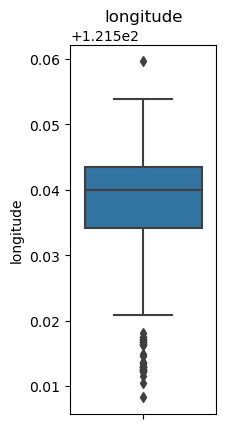

In [14]:
# Boxplot for 'house price of unit area'
plt.subplot(1, 3, 2)
sns.boxplot(y=house_data['longitude'])
plt.title('longitude')

In [15]:
#Drop the outliers
z = np.abs(stats.zscore(house_data['longitude']))
threshold = 0.04
outliers = house_data[z < threshold]

# drop rows containing outliers
house_data = house_data.drop(outliers.index)

house_data_without_outliers = house_data

    # 2.3 - Splitting into Train Data & Test Data

In [16]:
# b. Design ML Pipeline
# Split the dataset into features (X) and target label (y)
X = house_data.drop('house price of unit area', axis=1)
y = house_data['house price of unit area']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_test = y_test.to_numpy()

# Part 3 - Machine Learning Models - Initialization and Training

    # 3.1 Linear Regression Model - Training

In [18]:
# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

    # 3.2 Random Forest - Training

In [19]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

    # 3.3 K-Nearest Neighbors - Training

In [20]:
# Initialize and train the K-Nearest Neighbors model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

    # 3.4 Decision Tree Regression Model - Training

In [21]:
# Initialize and train the Decision Tree Regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

    # 3.5 Neural Network - Training

In [22]:
# Initialize and train the Neural Network model
def build_nn_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with 1 neuron for regression
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

nn_model = build_nn_model()
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)



Epoch 1/50


5/5 [==============================] - 2s 104ms/step - loss: 813.4630 - mae: 21.7881 - val_loss: 535.7507 - val_mae: 20.1519
Epoch 2/50
5/5 [==============================] - 0s 26ms/step - loss: 622.0579 - mae: 18.2829 - val_loss: 335.8414 - val_mae: 15.7834
Epoch 3/50
5/5 [==============================] - 0s 31ms/step - loss: 324.5143 - mae: 14.0096 - val_loss: 342.1913 - val_mae: 15.2741
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 321.5938 - mae: 14.8313 - val_loss: 259.1046 - val_mae: 13.6690
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 290.0735 - mae: 12.3145 - val_loss: 213.2663 - val_mae: 12.2937
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 233.2961 - mae: 12.5047 - val_loss: 120.0117 - val_mae: 8.1029
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 172.2895 - mae: 10.9580 - val_loss: 285.1844 - val_mae: 12.5926
Epoch 8/50
5/5 [==============================] - 0

# Part 4 - Machine Learning Models - Predictions

    # 4.1 Linear Regression Prediction

In [23]:
y_pred_linear_reg_predictions = linear_reg_model.predict(X_test)

    # 4.2 Random Forest Prediction

In [24]:
y_pred_rf_predictions = rf_model.predict(X_test)

    # 4.3 K-Nearest Neighbors Prediction

In [25]:
y_pred_knn_predictions = knn_model.predict(X_test)

    # 4.4 Decision Tree Regression Prediction

In [26]:
y_pred_dt_predictions = dt_model.predict(X_test)

    # 4.5 Neural Network Prediction

In [27]:
nn_model_predictions = nn_model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


# Part 5 - Machine Learning Model - Evaluation

    # 5.1 Linear Regression Evaluation

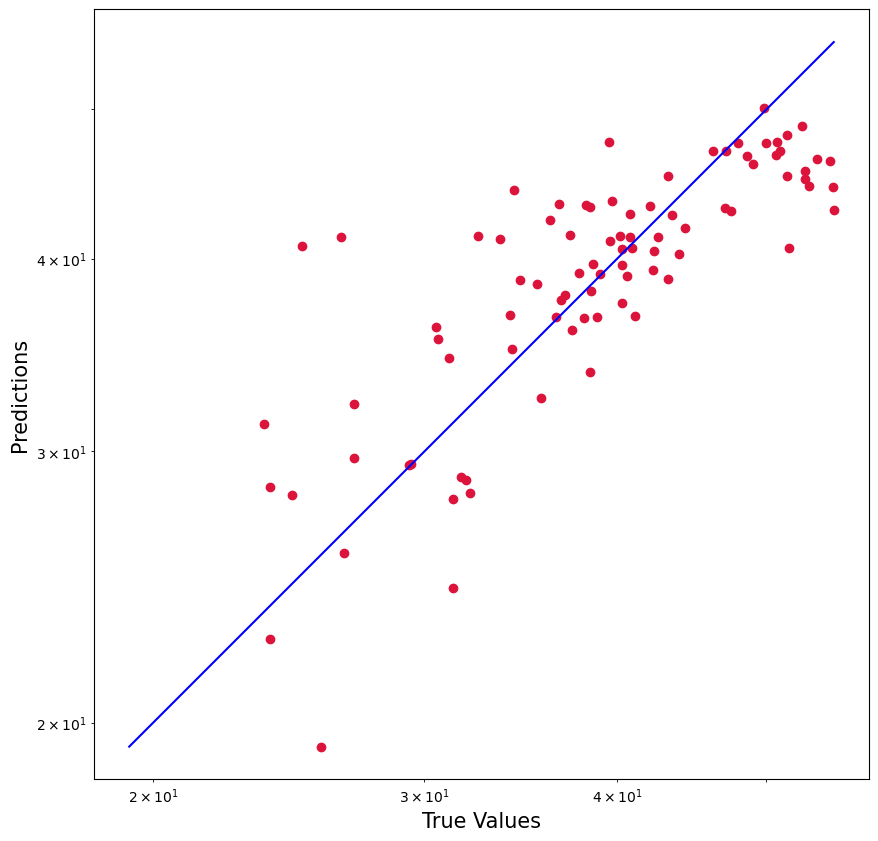

Linear Regression Model Evaluation:
Mean Squared Error: 26.29930733296144
R-squared: 0.635715043753682


In [28]:
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg_predictions)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg_predictions)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_linear_reg_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_linear_reg_predictions), max(y_test))
p2 = min(min(y_pred_linear_reg_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_linear_reg}")
print(f"R-squared: {r2_linear_reg}")


    # 5.2 Random Forest Evaluation

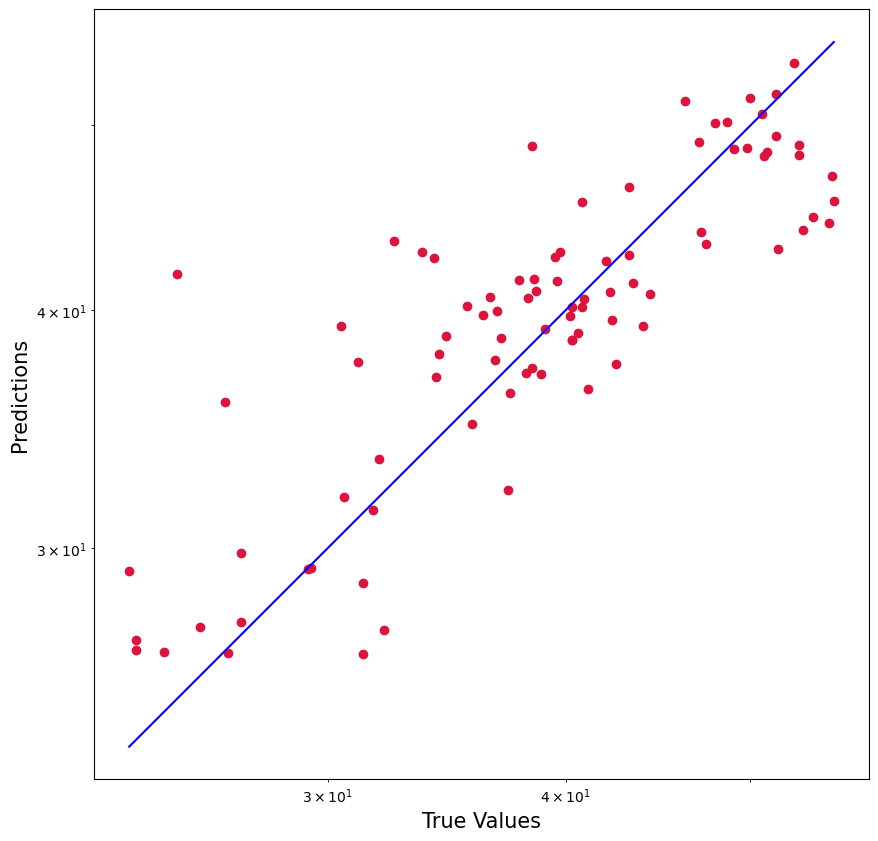

Random Forest Model Evaluation:
Mean Squared Error: 22.400325625000036
R-squared: 0.6897218038142322


In [29]:
mse_random_forest = mean_squared_error(y_test, y_pred_rf_predictions)
r2_random_forest = r2_score(y_test, y_pred_rf_predictions)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_rf_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_rf_predictions), max(y_test))
p2 = min(min(y_pred_rf_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

    # 5.3 K-Nearest Neighbors Evaluation

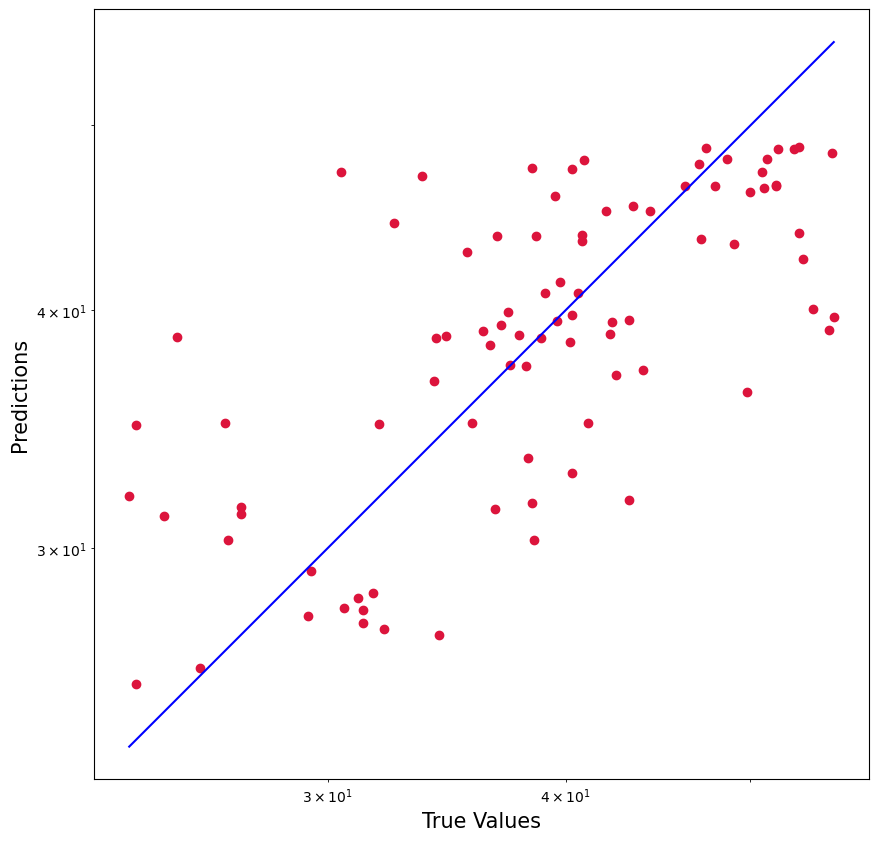

K-Nearest Neighbors Model Evaluation:
Mean Squared Error: 40.622718181818186
R-squared: 0.43731426352346514


In [30]:
mse_knn = mean_squared_error(y_test, y_pred_knn_predictions)
r2_knn = r2_score(y_test, y_pred_knn_predictions)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_knn_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_knn_predictions), max(y_test))
p2 = min(min(y_pred_knn_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("K-Nearest Neighbors Model Evaluation:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")

    # 5.4 Decision Tree Regression Evaluation

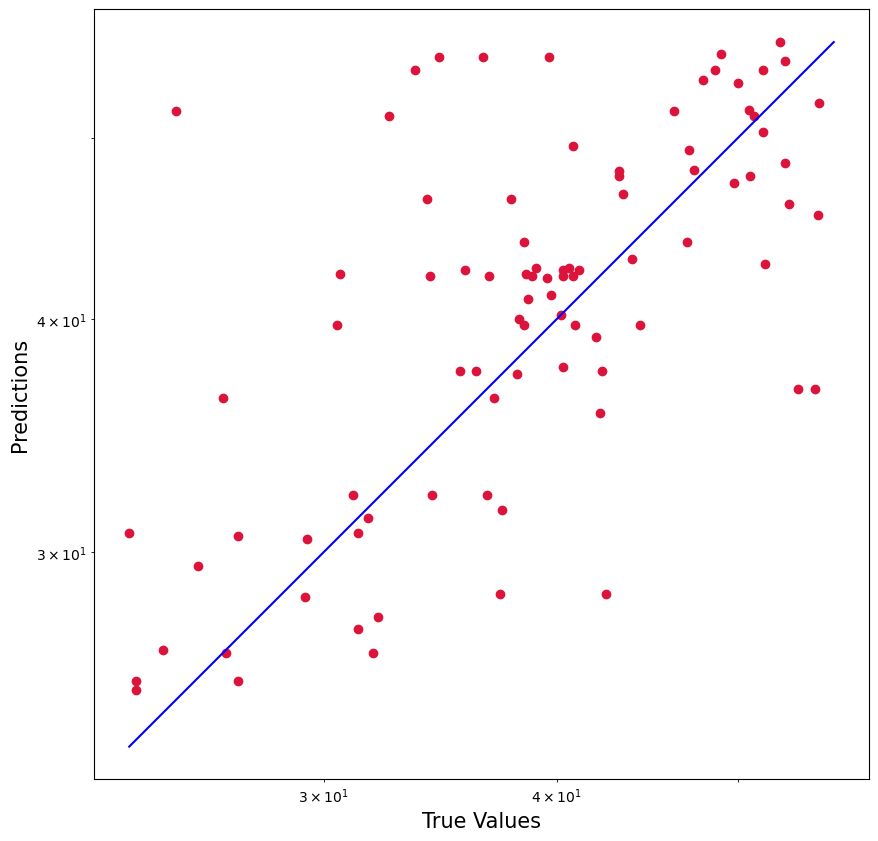

Decision Tree Regression Model Evaluation:
Mean Squared Error: 58.47909090909091
R-squared: 0.18997664830346717


In [31]:
mse_decision_tree_regression = mean_squared_error(y_test, y_pred_dt_predictions)
r2_decision_tree_regression = r2_score(y_test, y_pred_dt_predictions)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_dt_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_dt_predictions), max(y_test))
p2 = min(min(y_pred_dt_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Decision Tree Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_decision_tree_regression}")
print(f"R-squared: {r2_decision_tree_regression}")

    # 5.5 Neural Network Evaluation

In [32]:
mse_neural_network = mean_squared_error(y_test, nn_model_predictions)
r2_neural_network = r2_score(y_test, nn_model_predictions)

print("Neural Network Model Evaluation:")
print(f"Mean Squared Error: {mse_neural_network}")
print(f"R-squared: {r2_neural_network}")

Neural Network Model Evaluation:
Mean Squared Error: 53.9467810846113
R-squared: 0.2527559551955545


# Part 6: Experimentation and Improvements

    # 6.1 Numerical Attributes/Values Relationship Visualization

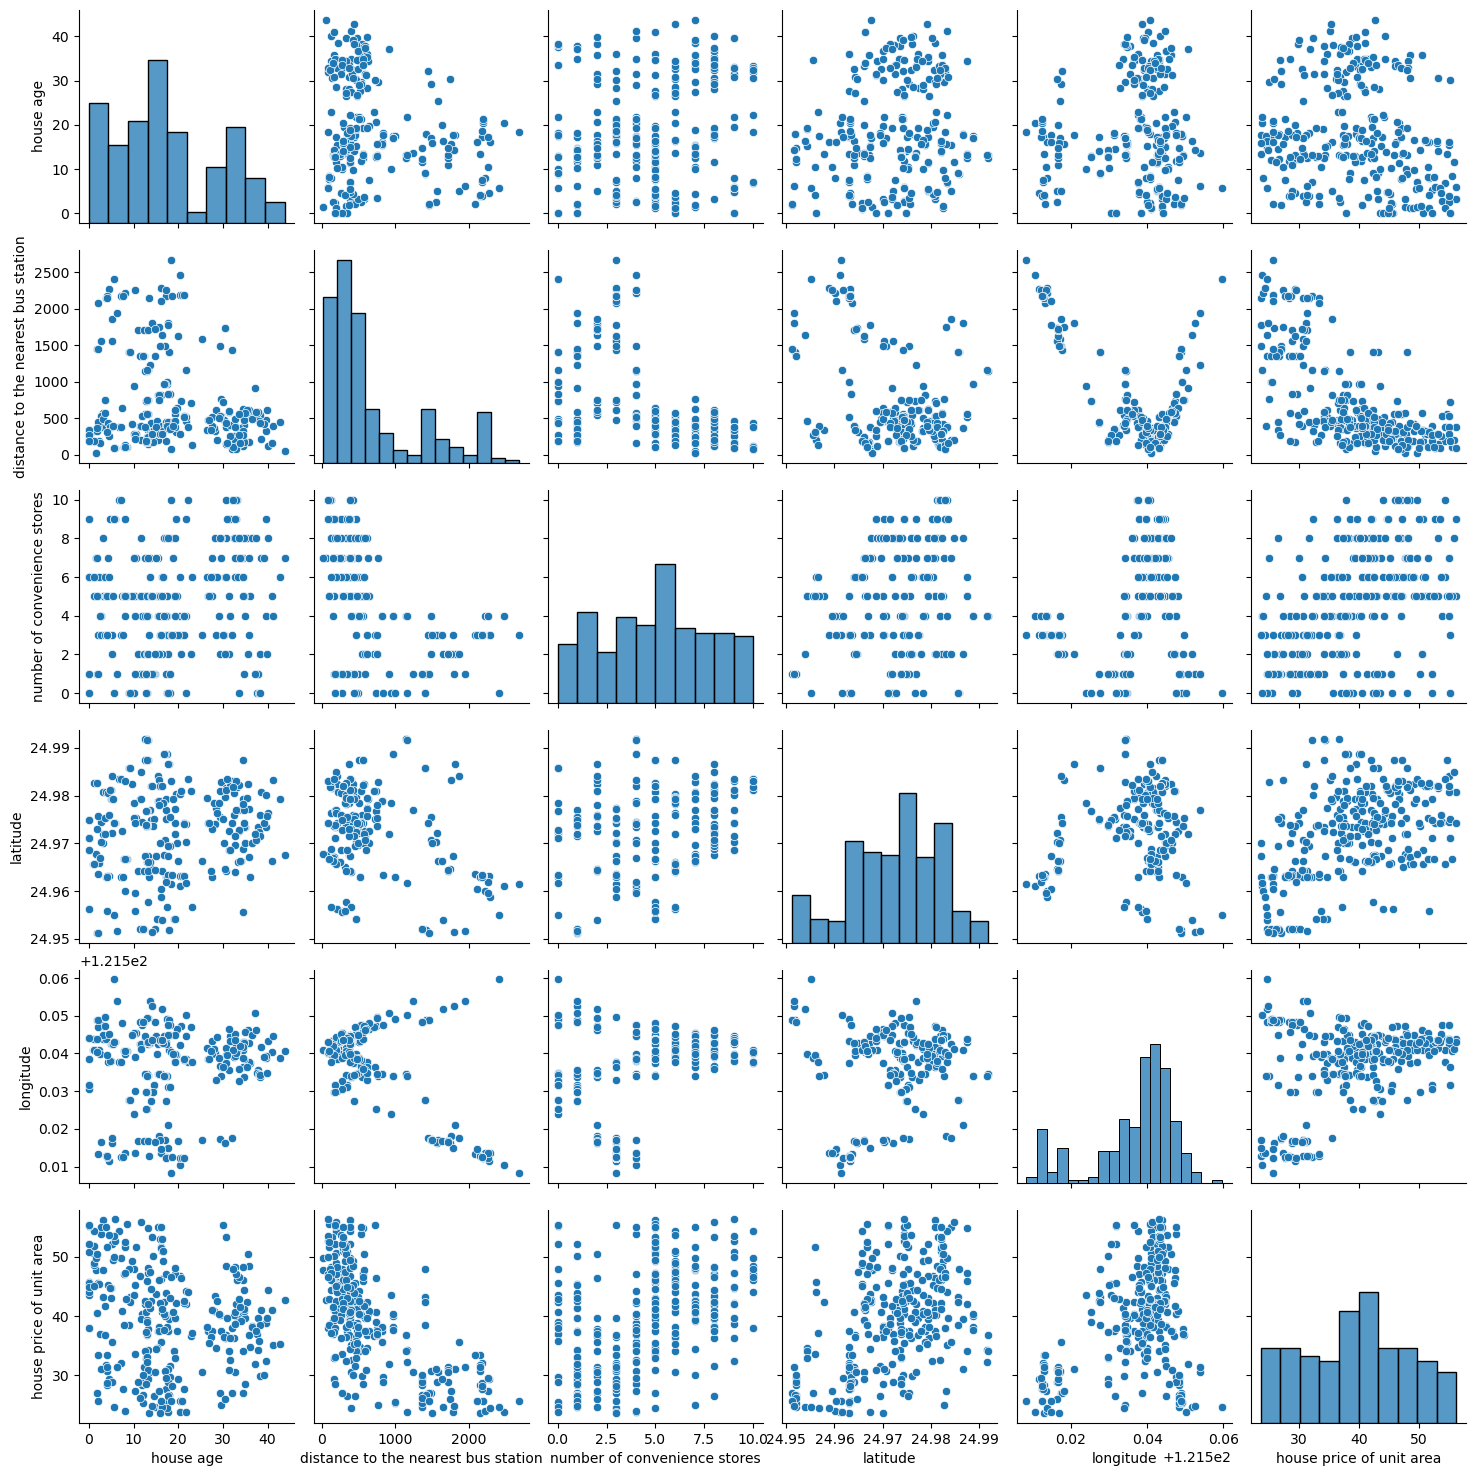

In [33]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(house_data[['house age', 'distance to the nearest bus station', 'number of convenience stores',
                         'latitude', 'longitude', 'house price of unit area']])

    # 6.2 Visualization of the Relationship between house price and house age

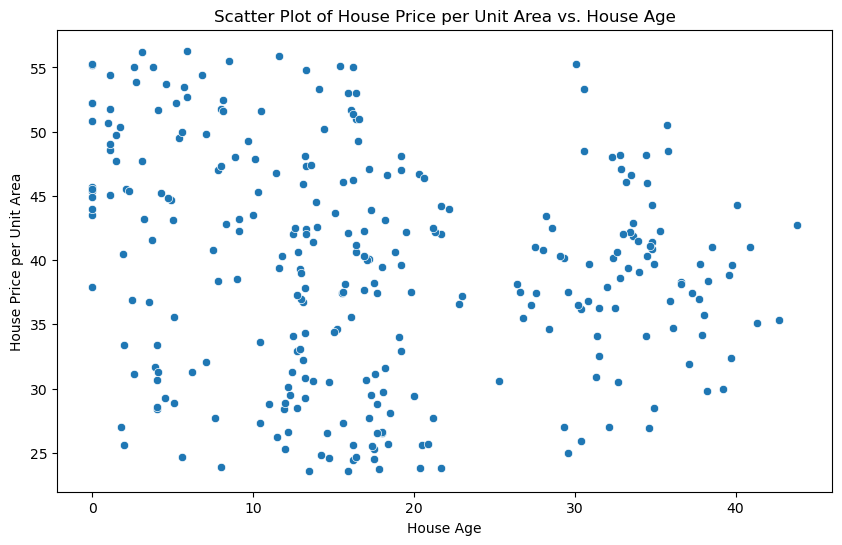

In [34]:
# Scatter plot of house price vs. house age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house age', y='house price of unit area', data=house_data)
plt.title('Scatter Plot of House Price per Unit Area vs. House Age')
plt.xlabel('House Age')
plt.ylabel('House Price per Unit Area')
plt.show()

    # 6.3 Visualization of the Relationship between house price and the distance to the nearest bus station

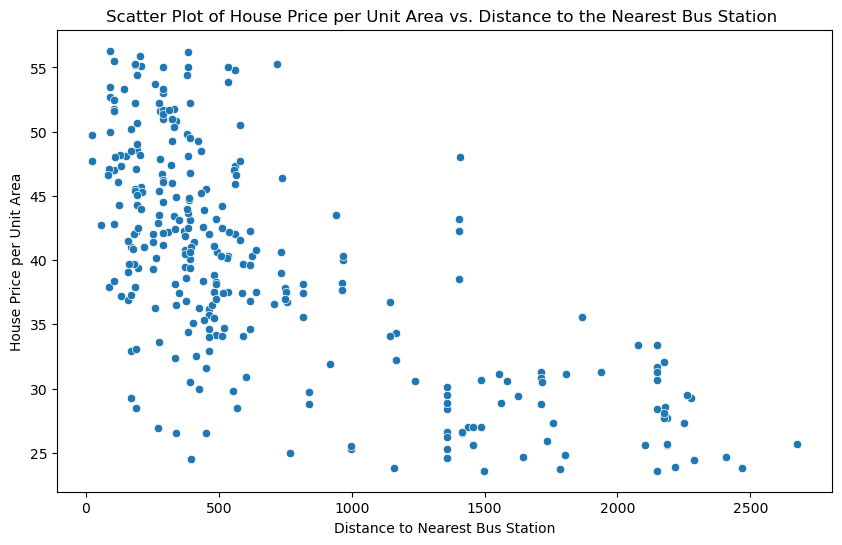

In [35]:
# Scatter plot of the house price vs. the distance to the nearest bus station
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance to the nearest bus station', y='house price of unit area', data=house_data)
plt.title('Scatter Plot of House Price per Unit Area vs. Distance to the Nearest Bus Station ')
plt.xlabel('Distance to Nearest Bus Station')
plt.ylabel('House Price per Unit Area')
plt.show()

    # 6.4 Visualization of the Relationship between house price and the distance to the nearest convenience store

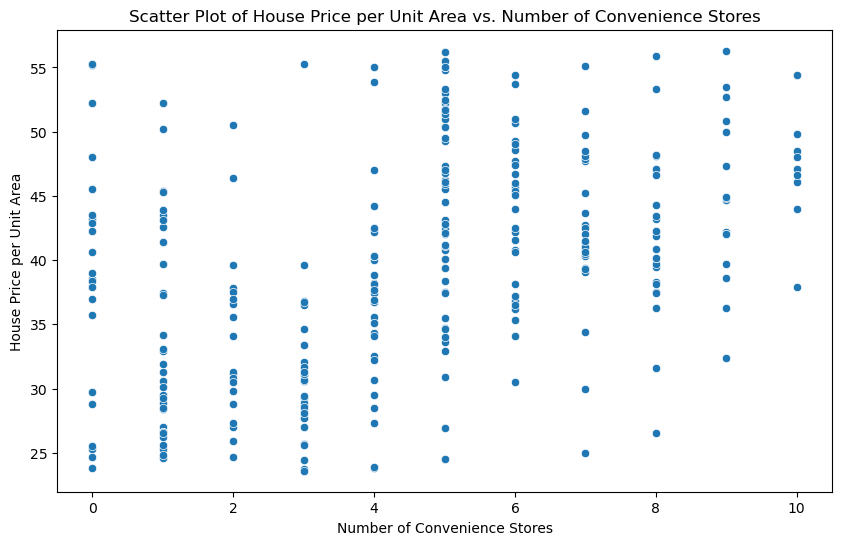

In [36]:
# Scatter plot of distance to the nearest house price vs. convenience store
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number of convenience stores', y='house price of unit area', data=house_data)
plt.title('Scatter Plot of House Price per Unit Area vs. Number of Convenience Stores')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price per Unit Area')
plt.show()

    # 6.5 Visualization of the Relationship between house price and the latitude of the house

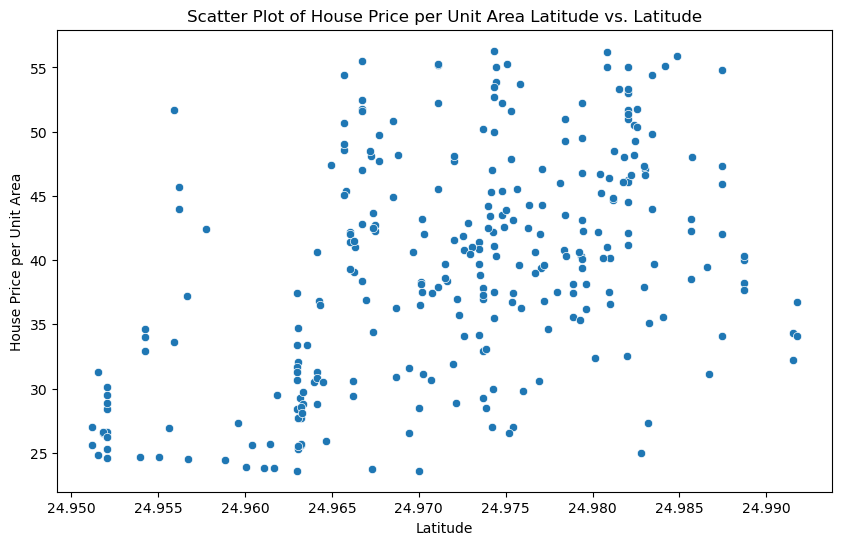

In [37]:
# Scatter plot of the house price vs. latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='house price of unit area', data=house_data)
plt.title('Scatter Plot of House Price per Unit Area Latitude vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('House Price per Unit Area')
plt.show()

    # 6.5 Visualization of the Relationship between house price and the longitude of the house

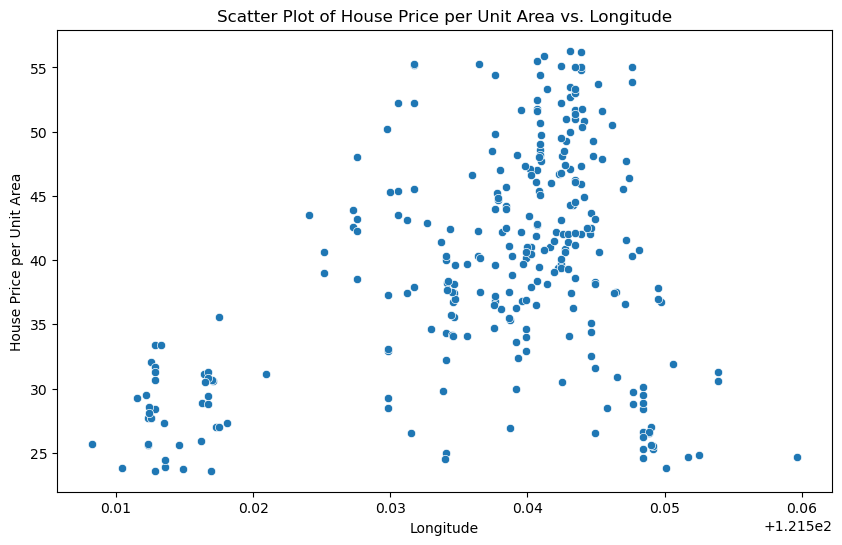

In [38]:
# Scatter plot of the house price vs. longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='house price of unit area', data=house_data)
plt.title('Scatter Plot of House Price per Unit Area vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('House Price per Unit Area')
plt.show()

    # 6.6 Exclude Attributes from dataset and re-run the models

    # Exclude the "House Age" attribute

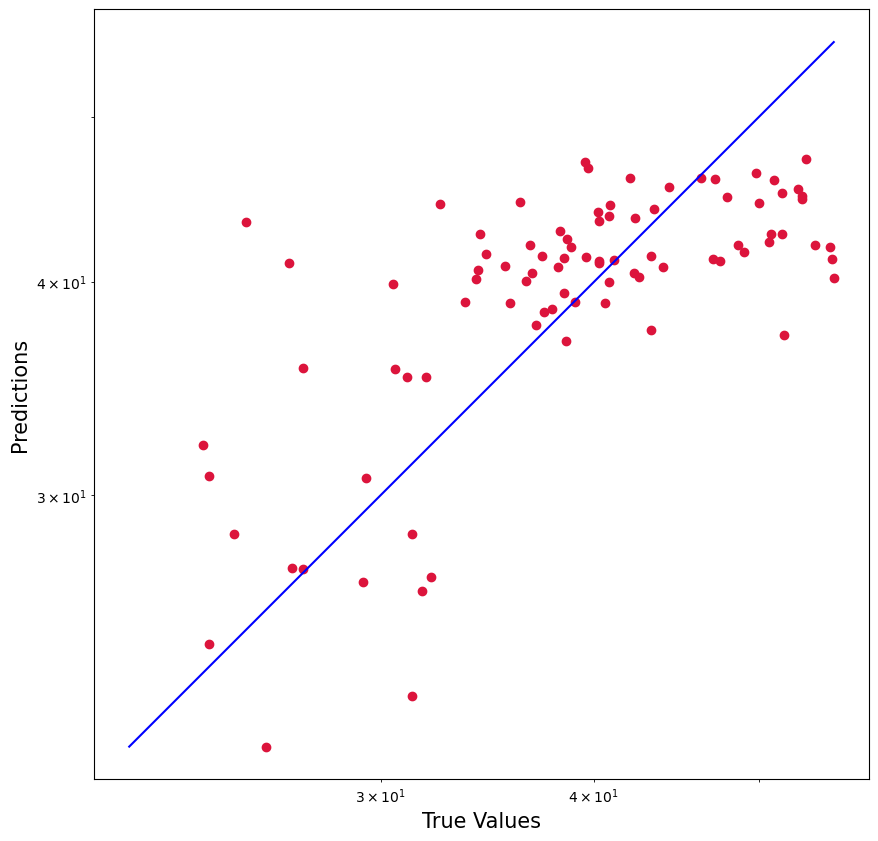

Random Forest Model Evaluation - age excluded:
Mean Squared Error: 40.698399904059755
R-squared: 0.4362659578579824


In [39]:
X_new_plot = house_data_without_outliers.drop(['house age', 'house price of unit area'], axis=1)
y_new_plot = house_data_without_outliers['house price of unit area']

# Split the data into training and testing sets
X_train_new_plot, X_test_new_plot, y_train_new_plot, y_test_new_plot = train_test_split(
    X_new_plot, y_new_plot, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
random_forest_model_new_plot = LinearRegression()
random_forest_model_new_plot.fit(X_train_new_plot, y_train_new_plot)

# Make predictions
y_pred_new_plot = random_forest_model_new_plot.predict(X_test_new_plot)

mean_squared_error_random_forest_age_excluded = mean_squared_error(y_test, y_pred_new_plot)
r2_random_forest_age_excluded = r2_score(y_test, y_pred_new_plot)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_new_plot, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_new_plot), max(y_test))
p2 = min(min(y_pred_new_plot), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Random Forest Model Evaluation - age excluded:")
print(f"Mean Squared Error: {mean_squared_error_random_forest_age_excluded}")
print(f"R-squared: {r2_random_forest_age_excluded}")

    # Exclude the distance to the nearest bus station

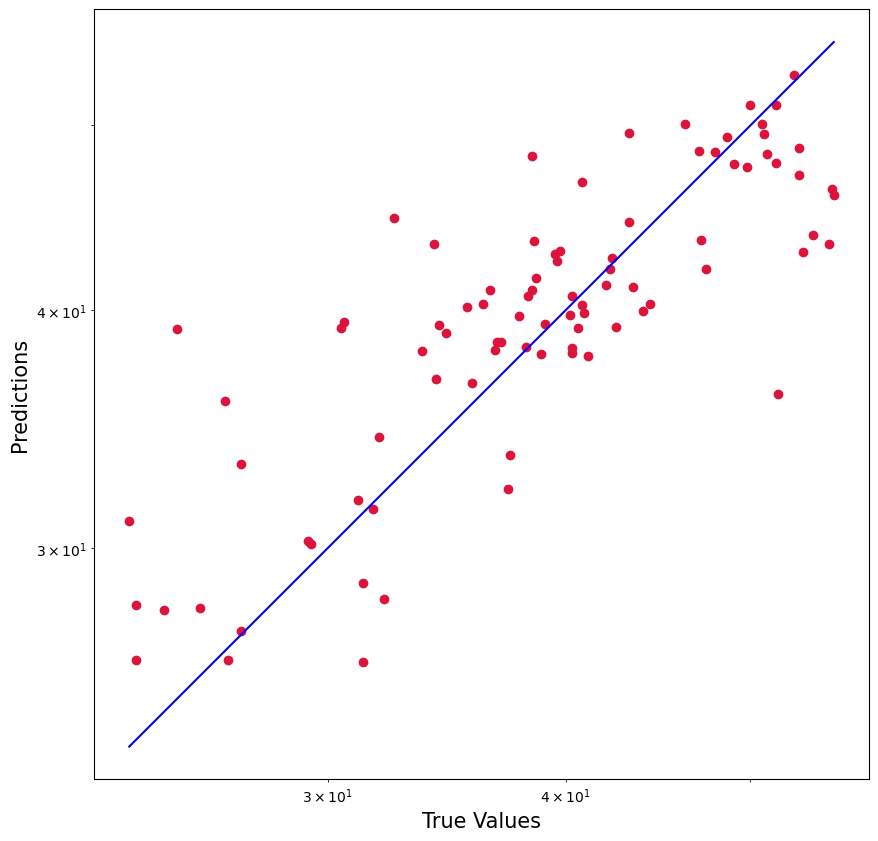

Random Forest Model Evaluation - Distance to bus station excluded:
Mean Squared Error: 25.712083829545463
R-squared: 0.6438489723602576


In [40]:
X_new_plot = house_data_without_outliers.drop(['distance to the nearest bus station', 'house price of unit area'], axis=1)
y_new_plot = house_data_without_outliers['house price of unit area']

# Split the data into training and testing sets
X_train_new_plot, X_test_new_plot, y_train_new_plot, y_test_new_plot = train_test_split(
    X_new_plot, y_new_plot, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
random_forest_model_new_plot = RandomForestRegressor()
random_forest_model_new_plot.fit(X_train_new_plot, y_train_new_plot)

# Make predictions
y_pred_new_plot = random_forest_model_new_plot.predict(X_test_new_plot)

mean_squared_error_random_forest_distance_bus_station_excluded = mean_squared_error(y_test, y_pred_new_plot)
r2_random_forest_distance_bus_station_excluded = r2_score(y_test, y_pred_new_plot)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_new_plot, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_new_plot), max(y_test))
p2 = min(min(y_pred_new_plot), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Random Forest Model Evaluation - Distance to bus station excluded:")
print(f"Mean Squared Error: {mean_squared_error_random_forest_distance_bus_station_excluded}")
print(f"R-squared: {r2_random_forest_distance_bus_station_excluded}")

    # Exclude the number convenience stores

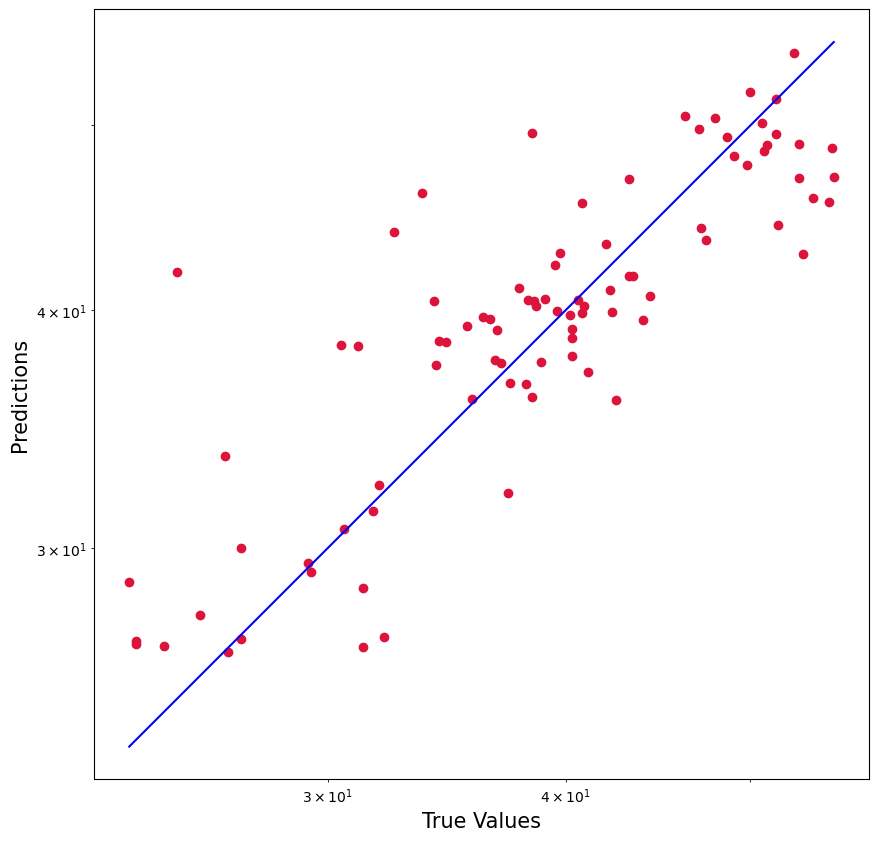

Random Forest Model Evaluation - Convenience Stores Excluded:
Mean Squared Error: 21.650726943181848
R-squared: 0.7001048728263273


In [41]:
X_new_plot = house_data_without_outliers.drop(['number of convenience stores', 'house price of unit area'], axis=1)
y_new_plot = house_data_without_outliers['house price of unit area']

# Split the data into training and testing sets
X_train_new_plot, X_test_new_plot, y_train_new_plot, y_test_new_plot = train_test_split(
    X_new_plot, y_new_plot, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
random_forest_model_new_plot = RandomForestRegressor()
random_forest_model_new_plot.fit(X_train_new_plot, y_train_new_plot)

# Make predictions
y_pred_new_plot = random_forest_model_new_plot.predict(X_test_new_plot)

mean_squared_error_random_forest_convenience_stores_excluded = mean_squared_error(y_test, y_pred_new_plot)
r2_random_forest_convenience_stores_excluded = r2_score(y_test, y_pred_new_plot)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_new_plot, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_new_plot), max(y_test))
p2 = min(min(y_pred_new_plot), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Random Forest Model Evaluation - Convenience Stores Excluded:")
print(f"Mean Squared Error: {mean_squared_error_random_forest_convenience_stores_excluded}")
print(f"R-squared: {r2_random_forest_convenience_stores_excluded}")

    # Exclude latitude and longitude

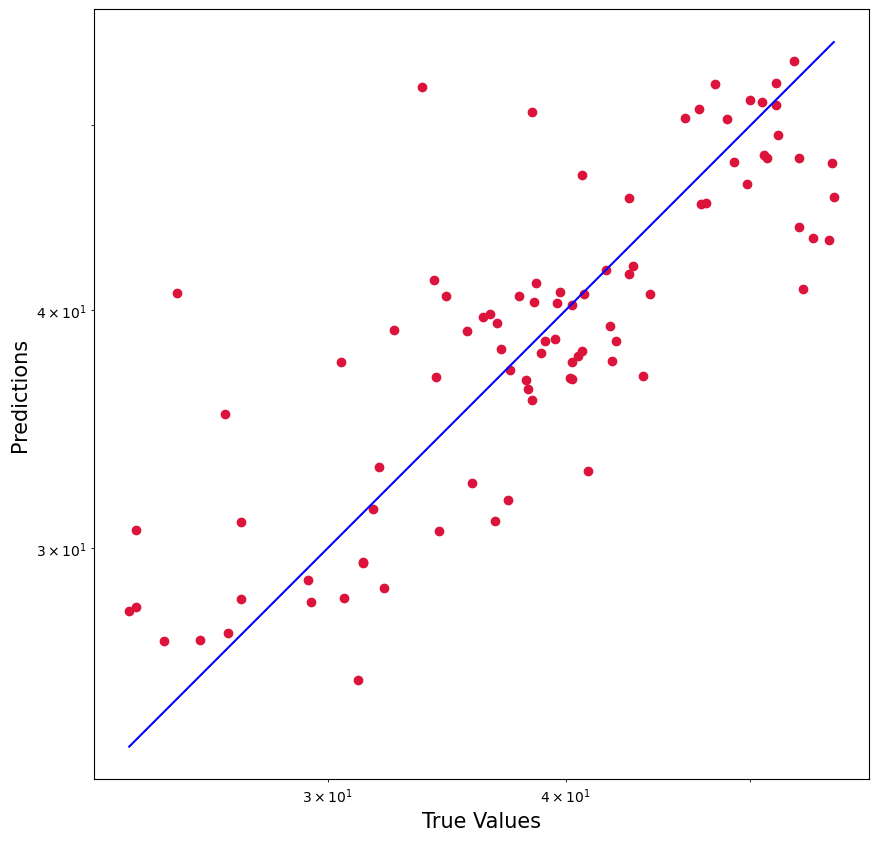

Random Forest Model Evaluation - Lat/Lon excluded:
Mean Squared Error: 26.80355577272733
R-squared: 0.6287304445590421


In [42]:
X_new_plot = house_data_without_outliers.drop(['latitude', 'longitude', 'house price of unit area'], axis=1)
y_new_plot = house_data_without_outliers['house price of unit area']

# Split the data into training and testing sets
X_train_new_plot, X_test_new_plot, y_train_new_plot, y_test_new_plot = train_test_split(
    X_new_plot, y_new_plot, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
random_forest_model_new_plot = RandomForestRegressor()
random_forest_model_new_plot.fit(X_train_new_plot, y_train_new_plot)

# Make predictions
y_pred_new_plot = random_forest_model_new_plot.predict(X_test_new_plot)

mean_squared_error_random_forest_latLon_excluded = mean_squared_error(y_test, y_pred_new_plot)
r2_random_forest_latLon_excluded = r2_score(y_test, y_pred_new_plot)

# Plotting the results
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_new_plot, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_new_plot), max(y_test))
p2 = min(min(y_pred_new_plot), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

print("Random Forest Model Evaluation - Lat/Lon excluded:")
print(f"Mean Squared Error: {mean_squared_error_random_forest_latLon_excluded}")
print(f"R-squared: {r2_random_forest_latLon_excluded}")

    # 6.7 Improving the Models using Hyperparameters

    # Random Forest

In [43]:
#--------------------------------------------------------------------------------------------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters - Random Forest Regressor:", best_params_rf)

# Evaluate the model with the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_pred_best_rf)
r2_random_forest = r2_score(y_test, y_pred_best_rf)

print("Random Forest Model Evaluation - Hyperparameters:")
print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

Best Hyperparameters - Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Model Evaluation - Hyperparameters:
Mean Squared Error: 22.480176130829037
R-squared: 0.688615754226922


    # K-Nearest Neighbors

In [44]:
# Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_
print("\nBest Hyperparameters - K-Nearest Neighbors (KNN):", best_params_knn)

# Evaluate the model with the best hyperparameters
best_knn_model = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_best_knn)
r2_knn = r2_score(y_test, y_pred_best_knn)

print("K-Nearest Neighbors Model Evaluation - Hyperparameters:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")


Best Hyperparameters - K-Nearest Neighbors (KNN): {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
K-Nearest Neighbors Model Evaluation - Hyperparameters:
Mean Squared Error: 33.122696671894225
R-squared: 0.5412008401925337


    # Decision Tree Regression Model

In [45]:
# Hyperparameter Tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print("\nBest Hyperparameters - Decision Tree Regressor:", best_params_dt)

# Evaluate the model with the best hyperparameters
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

mse_decision_tree_regression = mean_squared_error(y_test, y_pred_best_dt)
r2_decision_tree_regression = r2_score(y_test, y_pred_best_dt)

print("Decision Tree Regression Model Evaluation - Hyperparameters:")
print(f"Mean Squared Error: {mse_decision_tree_regression}")
print(f"R-squared: {r2_decision_tree_regression}")


Best Hyperparameters - Decision Tree Regressor: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Regression Model Evaluation - Hyperparameters:
Mean Squared Error: 35.75778074301691
R-squared: 0.5047009630892607


References:
Sources I read and used to create my Jupyter notebook:
* https://www.kaggle.com/code/alexisbcook/scatter-plots
* https://www.kaggle.com/code/georgezoto/data-visualization-scatter-plots
* https://www.kaggle.com/code/kaushiksuresh147/box-plot-python-implemenation/notebook
* https://www.kaggle.com/code/lusfernandotorres/the-abcs-of-machine-learning-4-essential-models#kmeans
* https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
* https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
* https://www.kaggle.com/code/pateljay731/prediction-with-the-knn-classifier
* https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
* https://www.kaggle.com/code/ryanholbrook/deep-neural-networks
* https://www.kaggle.com/code/viveknimsarkar/machine-learning-model-evaluation-and-error-metric
* https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics
* https://www.kaggle.com/code/shreayan98c/hyperparameter-tuning-tutorial